<a href="https://colab.research.google.com/github/irshadmb/MachineLearning/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
keras = tf.keras
import numpy as np

model = keras.Sequential([
    keras.Input(shape=(1,)), # Recommended way to define input shape
    keras.layers.Dense(units=1)
])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

print(model.predict(np.array([[10.0]])))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 12.0765
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.7248
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 7.8699
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 6.4061
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 5.2500
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.3362
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 3.6130
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3.0399
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2.5850
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2.2231
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 1.9344
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.7036
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1.5182
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.3687
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.2475
Epoch 16/500
1/1 

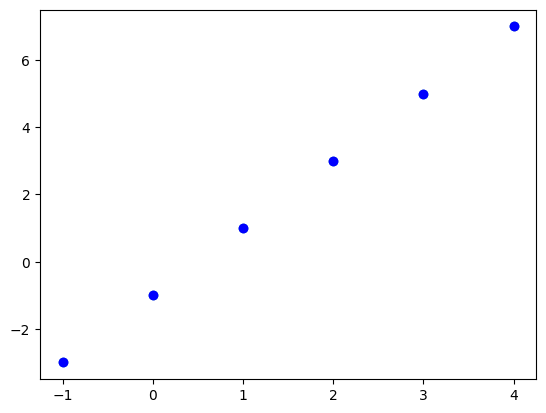

In [17]:
import math
import matplotlib.pyplot as plt

w = 2
b = -1

x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

myY = []

for xVal in x:
    myY.append(w * xVal + b)


plt.scatter(x, y)
plt.scatter(x, myY, color='blue')
plt.vlines(x, ymin=min(y,myY), ymax=max(y,myY), color='red', linestyles='--')
plt.show()

In [37]:
class Modal(object):
  def __init__(self):
    self.w = tf.Variable(10.0)
    self.b = tf.Variable(10.0)
  def __call__(self, x):
    return self.w * x + self.b

In [38]:
def loss(y, y_pred):
  return tf.reduce_mean(tf.square(y - y_pred))

In [39]:
def train(model, x, y, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(x), y)

  dw, db = t.gradient(current_loss, [model.w, model.b])

  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)
  return current_loss

In [40]:
modal = Modal()
print(modal(x))


tf.Tensor([ 0. 10. 20. 30. 40. 50.], shape=(6,), dtype=float32)


In [41]:
for epochs in range(500):
  current_loss = train(modal, x, y, learning_rate=0.01)
  print('Epoch %2d: loss=%2.5f x=%2.5f y=%2.5f' % (epochs, current_loss, modal.b, modal.w))

Epoch  0: loss=715.66669 x=9.54000 y=8.84333
Epoch  1: loss=569.43903 x=9.12390 y=7.81999
Epoch  2: loss=454.26303 x=8.74682 y=6.91487
Epoch  3: loss=363.51962 x=8.40444 y=6.11460
Epoch  4: loss=292.00122 x=8.09291 y=5.40729
Epoch  5: loss=235.61072 x=7.80884 y=4.78242
Epoch  6: loss=191.12463 x=7.54919 y=4.23063
Epoch  7: loss=156.00688 x=7.31128 y=3.74366
Epoch  8: loss=128.26210 x=7.09275 y=3.31414
Epoch  9: loss=106.32037 x=6.89147 y=2.93557
Epoch 10: loss=88.94657 x=6.70557 y=2.60215
Epoch 11: loss=75.16886 x=6.53340 y=2.30876
Epoch 12: loss=64.22261 x=6.37347 y=2.05085
Epoch 13: loss=55.50622 x=6.22447 y=1.82439
Epoch 14: loss=48.54631 x=6.08525 y=1.62580
Epoch 15: loss=42.97042 x=5.95477 y=1.45191
Epoch 16: loss=38.48546 x=5.83212 y=1.29991
Epoch 17: loss=34.86081 x=5.71648 y=1.16729
Epoch 18: loss=31.91500 x=5.60713 y=1.05184
Epoch 19: loss=29.50518 x=5.50343 y=0.95160
Epoch 20: loss=27.51895 x=5.40482 y=0.86483
Epoch 21: loss=25.86785 x=5.31077 y=0.78999
Epoch 22: loss=24.4822